In [1]:
# Cónicas en el espacio

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [97]:
# Matriz de Rotación
def rotationMatrix(t,axis):
    R=np.identity(3)
    r=np.array([[np.cos(t),np.sin(t)],[-np.sin(t),np.cos(t)]])
    if axis=='z':R[0:2,0:2]=r
    elif axis=='x':R[1:3,1:3]=r
    else:
        R[0,0]=r[0,0];R[0,2]=r[0,1]
        R[2,0]=r[1,0];R[2,2]=r[1,1]
    return R

In [98]:
# Cónica en su sistema de referencia natural
p=1.0
e=0.5
if e>1:fmax=np.arccos(-1/e)
else:fmax=np.pi

fs=np.linspace(-fmax,fmax)
rs=p/(1+e*np.cos(fs))
xs=rs*np.cos(fs)
ys=rs*np.sin(fs)
zs=0*fs

In [99]:
# Orientación
DEG=180/np.pi

i = 90*DEG
O = 0*DEG
w = 0*DEG

In [100]:
# Matriz de rotación
Rtot=(rotationMatrix(-O,'z').dot(rotationMatrix(-i,'x'))).dot(rotationMatrix(-w,'z'))
print Rtot
# Cónica rotada
xpps=[]
ypps=[]
zpps=[]
for x,y,z in zip(xs,ys,zs):
    r=np.array([x,y,z])
    rp=Rtot.dot(r)
    xpps+=[rp[0]]
    ypps+=[rp[1]]
    zpps+=[rp[2]]

[[ 1.          0.          0.        ]
 [ 0.         -0.29951539  0.95409147]
 [ 0.         -0.95409147 -0.29951539]]


(-2, 2)

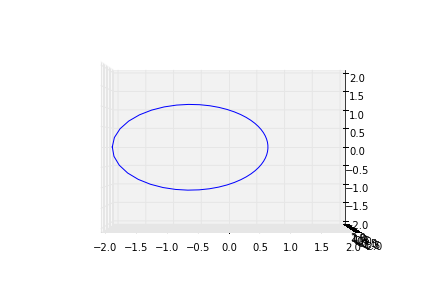

In [101]:
fig = plt.figure()
ax=Axes3D(fig)

ax.plot(xpps,ypps,zpps)
ax.view_init(elev=0,azim=270)
ext=2
ax.set_xlim(-ext,ext)
ax.set_ylim(-ext,ext)
ax.set_zlim(-ext,ext)